# Video Transcription and Annotation

## Setup

In [1]:
import os
import glob
import pandas as pd

#from moviepy.editor import *
import moviepy.editor as mp

import whisper

### Set Directories

In [2]:
proj_dir = '/Users/hpopal/Google Drive/My Drive/dscn_lab/projects/net/'
data_dir = proj_dir+'derivatives/task-naturalistic/stimuli/'
outp_dir = proj_dir+'derivatives/speech_analysis/'

os.chdir(proj_dir)

In [152]:
clip_name='partly_cloudy_hd'

In [153]:
video_clip = mp.VideoFileClip(data_dir+clip_name+'.avi')
# Extract the audio from the video clip
audio_clip = video_clip.audio

In [154]:
video_clip.fps

29.97002997002997

In [158]:
audio_clip

In [157]:
# Extract the audio segment from the video
#audio_segment = video_clip.subclip(current_time, current_time + remaining_duration)
audio_clip = video_clip.audio
audio_path = outp_dir+clip_name+'.wav'
audio_clip.write_audiofile(audio_path, codec='pcm_s16le')

AttributeError: 'NoneType' object has no attribute 'write_audiofile'

In [7]:
model = whisper.load_model("small")
result = model.transcribe(audio_path, word_timestamps=True)
print(result["text"])

 When you look at me, you probably see a guy who has it all. But really, there's a large part of me that's immature and underdeveloped, especially when it comes to women. Every girl I liked growing up rejected me, and because of that, I've grown into a man who is chronically nervous around women. I'm an emotional midget. Now, if someone came to me with this problem, I'd suggest immersion therapy, where you overwhelm yourself with your fear in order to overcome it. So tonight, to inspire you, I'm going to attempt to overcome my fear of the opposite sex by dating not one, but ten women at the same time. Wish me luck. I needed to get ten women to agree to date me, so I thought it'd be easy to start with someone I work with. So, you know how I'm doing the thing on the show where I'm dating, like, ten women at the same time? Yeah. You're in a relationship right now? Yes. Okay. So, sorry, never mind. That's a stupid task. It didn't work, and I knew from experience that women just wouldn't st

In [8]:
transcript_ts = pd.DataFrame(columns=['Text','Start_time','End_time'])

for idx in range(len(result['segments'])):
    transcript_ts.loc[idx, 'Text'] = result['segments'][idx]['text']
    transcript_ts.loc[idx, 'Start_time'] = result['segments'][idx]['start']
    transcript_ts.loc[idx, 'End_time'] = result['segments'][idx]['end']



In [9]:
transcript_ts

,Text,Start_time,End_time
0,"When you look at me, you probably see a guy w...",0.0,3.2
1,"But really, there's a large part of me that's...",3.8,8.32
2,especially when it comes to women.,8.38,10.4
3,"Every girl I liked growing up rejected me,",11.58,14.0
4,"and because of that, I've grown into a man wh...",14.34,18.5
...,...,...,...
64,Will they find love?,182.14,183.2
65,Will they find their soulmate?,183.74,185.18
66,I'm Anthony Napoli.,185.82,186.84
67,This is The Hunk.,187.3,188.66


# Sentiment Analysis

In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [11]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hpopal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/hpopal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/hpopal/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hpopal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hpopal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
def preprocess(text):
    # Lowercase and then tokenize (split into words) the text
    tokens = word_tokenize(text.lower())

    # Remove stop words (common words with minimal content - mostly grammatical words)
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens (reduce words to base lemmas - i.e., form found in dictionary)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [13]:
analyzer = SentimentIntensityAnalyzer()
def polarity(text):
    pol = analyzer.polarity_scores(text)
    return pol

In [159]:
cleaned_text = preprocess(transcript_ts.loc[0,'Text'])
cleaned_text

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


'look , probably see guy .'

In [15]:
polarity(cleaned_text)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [16]:
for i_row in range(len(transcript_ts)):
    cleaned_text = preprocess(transcript_ts.loc[i_row,'Text'])
    transcript_ts.loc[i_row,'Text_clean'] = cleaned_text

    temp_sent = polarity(cleaned_text)
    transcript_ts.loc[i_row,'neg'] = temp_sent['neg']
    transcript_ts.loc[i_row,'neu'] = temp_sent['neu']
    transcript_ts.loc[i_row,'pos'] = temp_sent['pos']

In [17]:
transcript_ts.head()

,Text,Start_time,End_time,Text_clean,neg,neu,pos
0,"When you look at me, you probably see a guy w...",0.0,3.2,"look , probably see guy .",0.000,1.000,0.000
1,"But really, there's a large part of me that's...",3.8,8.32,"really , 's large part 's immature underdevelo...",0.000,1.000,0.000
2,especially when it comes to women.,8.38,10.4,especially come woman .,0.000,1.000,0.000
3,"Every girl I liked growing up rejected me,",11.58,14.0,"every girl liked growing rejected ,",0.337,0.204,0.459
4,"and because of that, I've grown into a man wh...",14.34,18.5,", 've grown man chronically nervous around wom...",0.259,0.741,0.000


# Create Regressors
Translate features of interest in to regressors with a value for each TR. This can be used to correlate with the reverse correlation significant activations output.

In [21]:
from nilearn.glm.first_level import compute_regressor
import numpy as np

In [22]:
tr = 1.25  # repetition time is 1 second
n_scans = 476  # the acquisition comprises 128 scans
frame_times = np.arange(n_scans) * tr 

In [23]:


# Make onsets like file
events = pd.DataFrame(columns=['trial_type', 'onset', 'duration'])

events['trial_type'] = transcript_ts['Text']
events['onset'] = pd.to_numeric(transcript_ts['Start_time'])
events['duration'] = pd.to_numeric(transcript_ts['End_time'] - transcript_ts['Start_time'])


# Make empty dataframe for feature regressors
features_df = pd.DataFrame(index = frame_times)

features = ['neg','neu','pos']

for feat in features:
    events[feat] = pd.to_numeric(transcript_ts[feat])

    temp_dm = events[['onset','duration',feat]].to_numpy()
    signal_feat, _labels = compute_regressor(temp_dm.T, 'spm', 
                                            frame_times, con_id=feat)

    features_df[feat] = signal_feat
    
features_df.head(20)

,neg,neu,pos
0.00,0.000000,0.000000,0.000000
1.25,0.000000,0.002107,0.000000
2.50,0.000000,0.049596,0.000000
3.75,0.000000,0.210905,0.000000
5.00,0.000000,0.448752,0.000000
6.25,0.000000,0.651059,0.000000
7.50,0.000000,0.796770,0.000000
8.75,0.000000,0.912842,0.000000
10.00,0.000000,1.003534,0.000000
11.25,0.000000,1.059920,0.000000


<Axes: >

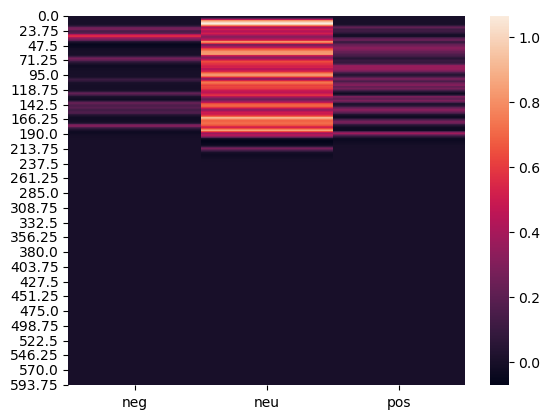

In [24]:
import seaborn as sns
sns.heatmap(features_df)

In [ ]:
# Create Time Series Regressors
from nilearn.glm.first_level import compute_regressor


# Set scan specific parameters
tr = args.TR
n_scans = args.Frames
frame_times = np.arange(n_scans) * tr 


# Make onsets like file
events = pd.DataFrame(columns=['trial_type', 'onset', 'duration'])

events['trial_type'] = transcript_ts['Text']
events['onset'] = pd.to_numeric(transcript_ts['Start_time'])
events['duration'] = pd.to_numeric(transcript_ts['End_time'] - transcript_ts['Start_time'])


# Make empty dataframe for feature regressors
features_df = pd.DataFrame(index = frame_times)

features = ['neg','neu','pos']

for feat in features:
    events[feat] = pd.to_numeric(transcript_ts[feat])

    temp_dm = events[['onset','duration',feat]].to_numpy()
    signal_feat, _labels = compute_regressor(temp_dm.T, 'spm', 
                                            frame_times, con_id=feat)

    features_df[feat] = signal_feat


# Export
features_df.to_csv(outp_dir+'annotations/'+clip_name+'_annotations-fmri.csv')